<a href="https://colab.research.google.com/github/AnnaKudrina86659/Project_of_analysis_medical_data/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BF%D0%BE_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D1%83_%D0%BC%D0%B5%D0%B4%D0%B8%D1%86%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект по анализу медицинских данных

### Вводная часть

Острое повреждение почек (ОПП) — опасное осложнение, которое может возникать у пациентов, влияющее на качество их жизни при наличии сопутствующих заболеваний. ОПП существенно ухудшает прогноз, увеличивает продолжительность госпитализации и требует дополнительных ресурсов на лечение.

Понимание факторов, повышающих риск развития ОПП, имеет важное значение для клинической практики. Оно помогает вовремя выявлять пациентов из группы риска, принимать профилактические меры и улучшать исходы лечения.

#### Цель проекта

Цель проекта — выявить факторы, статистически связанные с развитием ОПП у пациентов с сопутствующими осложнениями.

Для этого будут выполнены:
- графический анализ данных;
- формулировка и проверка статистических гипотез;
- исследование влияния сочетаний признаков на риск развития ОПП.

#### Описание данных

Для анализа используется датасет medic_new.csv. В таблице представлено более 30 признаков, охватывающих различные аспекты состояния пациентов.

##### Целевая переменная:
- развитие_опп — наличие или отсутствие ОПП (категориальная переменная: "да"/"нет")

##### Клинические характеристики:
- возраст — возраст пациента (в годах)  
- пол — пол пациента  
- хбп — стадия хронической болезни почек  
- гб — наличие гипертонической болезни  
- сахарный_диабет — наличие сахарного диабета  
- стенокардия — наличие стенокардии  
- инфаркт_миокарда — наличие инфаркта миокарда  
- мерцательная_аритмия — наличие мерцательной аритмии  
- а-в_блокада — наличие атриовентрикулярной блокады  
- хсн — наличие хронической сердечной недостаточности  

##### Показатели гемодинамики:
- сад — систолическое артериальное давление (мм рт. ст.)  
- дад — диастолическое артериальное давление (мм рт. ст.)  
- чсс — частота сердечных сокращений (уд/мин)  

##### Биохимические показатели крови:
- креатинин_крови (мкмоль/л)  
- мочевина (ммоль/л)  
- калий, натрий, хлориды, кальций (мэкв/л)  
- гемоглобин (г/л)  
- лейкоциты, тромбоциты (тыс/мкл)  
- холестерин (ммоль/л)  
- общий_белок (г/л)  

##### Антропометрия и данные по операции:
- имт — индекс массы тела (кг/м²)  
- толщина_паренхимы_почек (мм)  
- количество_шунтов — число шунтов, наложенных при операции  
- длительность_операции (мин)  
- объем_кровопотерии (мл)

---

Эти данные позволяют оценить влияние как отдельных медицинских показателей, так и их сочетаний на риск развития ОПП, что и будет предметом дальнейшего анализа.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, chi2_contingency

## Загрузите данные

In [6]:
df = pd.read_csv('medic_new.csv', sep=';', decimal=',', encoding='utf-8')

# Проверка корректности загрузки
print(df.info())  # Показывает количество строк, названия и типы столбцов, количество непустых значений

# Преобразование столбца "возраст" в числовой тип
df['возраст'] = pd.to_numeric(df['возраст'], errors='coerce')

# Проверка наличия дубликатов
duplicates = df.duplicated().sum()
print(f'Количество дубликатов: {duplicates}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   развитие_опп             199 non-null    object 
 1   хбп                      199 non-null    object 
 2   возраст                  199 non-null    int64  
 3   пол                      199 non-null    object 
 4   гб                       199 non-null    object 
 5   сахарный_диабет          199 non-null    object 
 6   стенокардия              199 non-null    object 
 7   инфаркт_миокарда         199 non-null    object 
 8   мерцательная_аритмия     199 non-null    object 
 9   а-в_блокада              199 non-null    object 
 10  сад                      199 non-null    int64  
 11  дад                      199 non-null    int64  
 12  креатинин_крови          199 non-null    int64  
 13  мочевина                 198 non-null    float64
 14  калий                    1

### Выводы:
- Данные успешно загружены.
- Структура датафрейма проверена: определены типы данных и отсутствие пропусков.
- Столбец `'возраст'` приведён к числовому типу с обработкой ошибок.
- Найдено **0** дубликатов.

## Проверка гипотез

### Проведите графический анализ количественных переменных

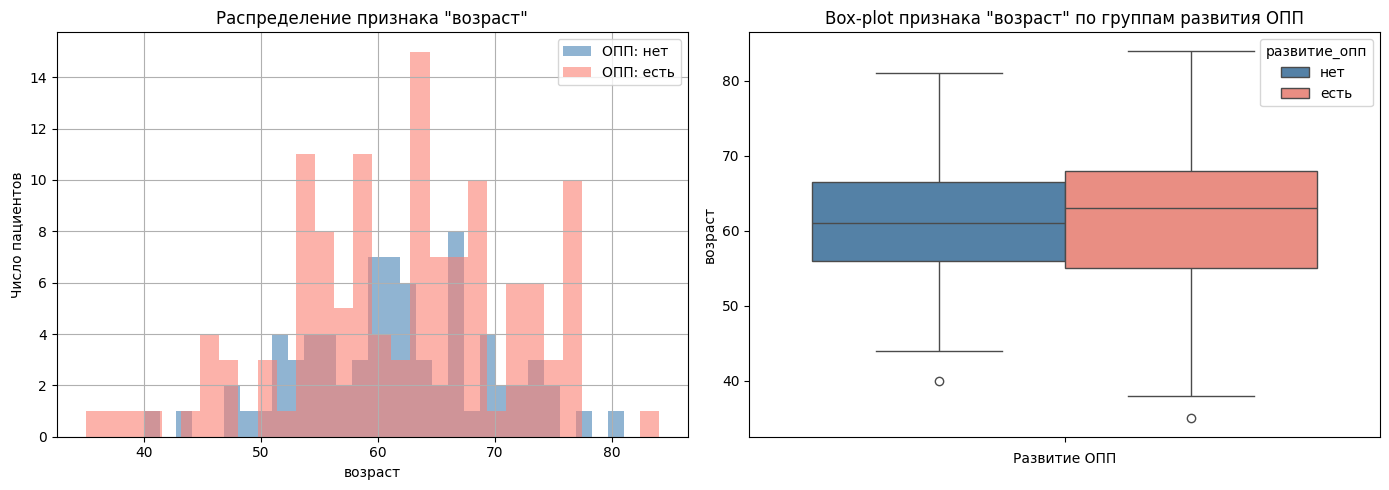

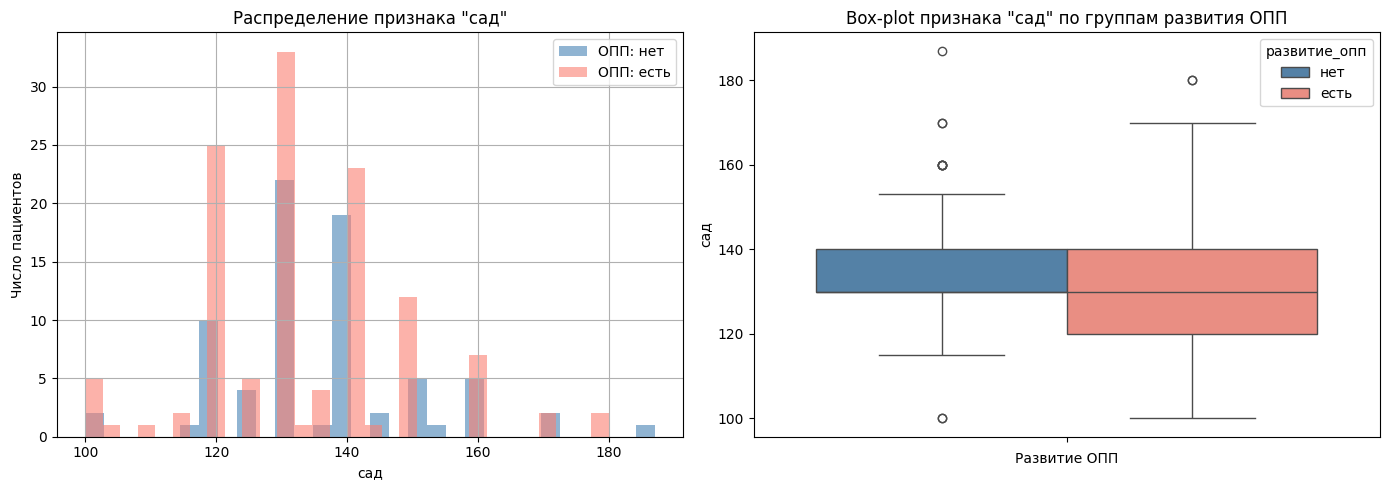

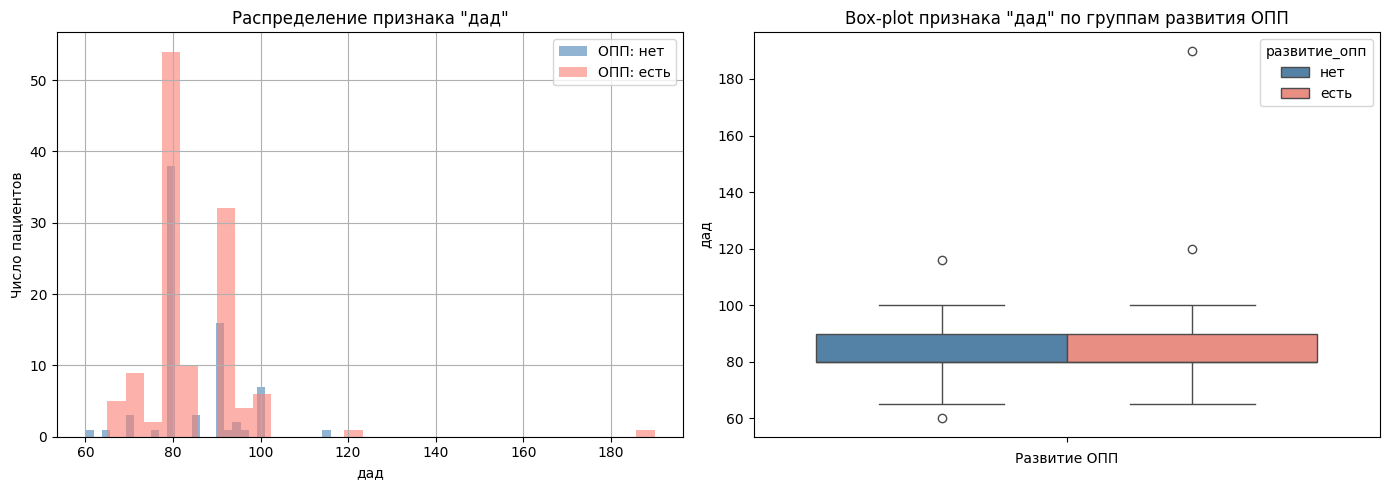

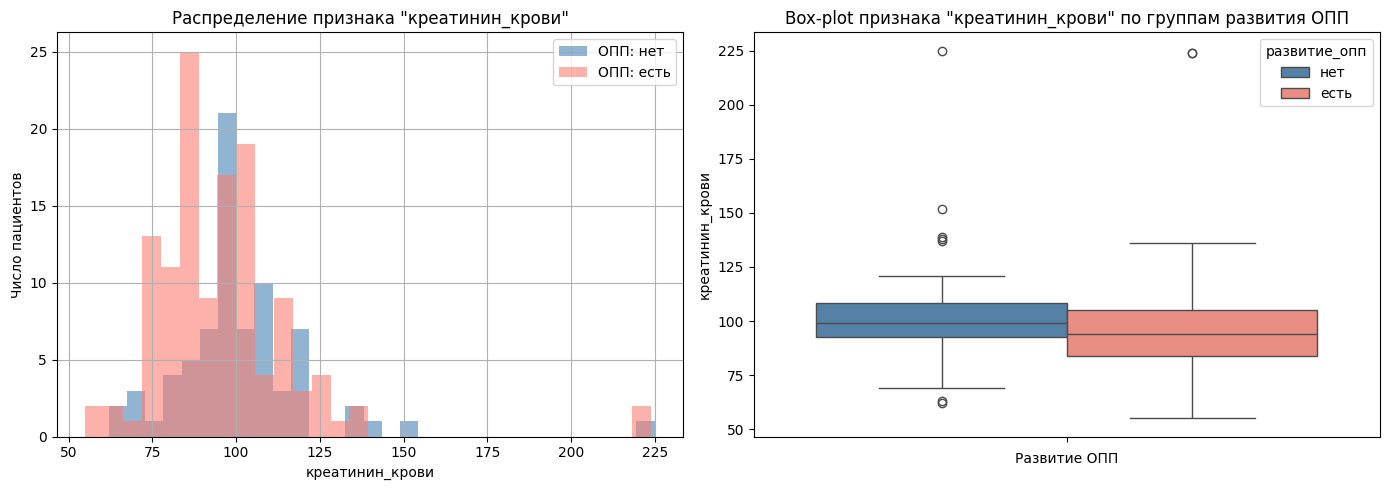

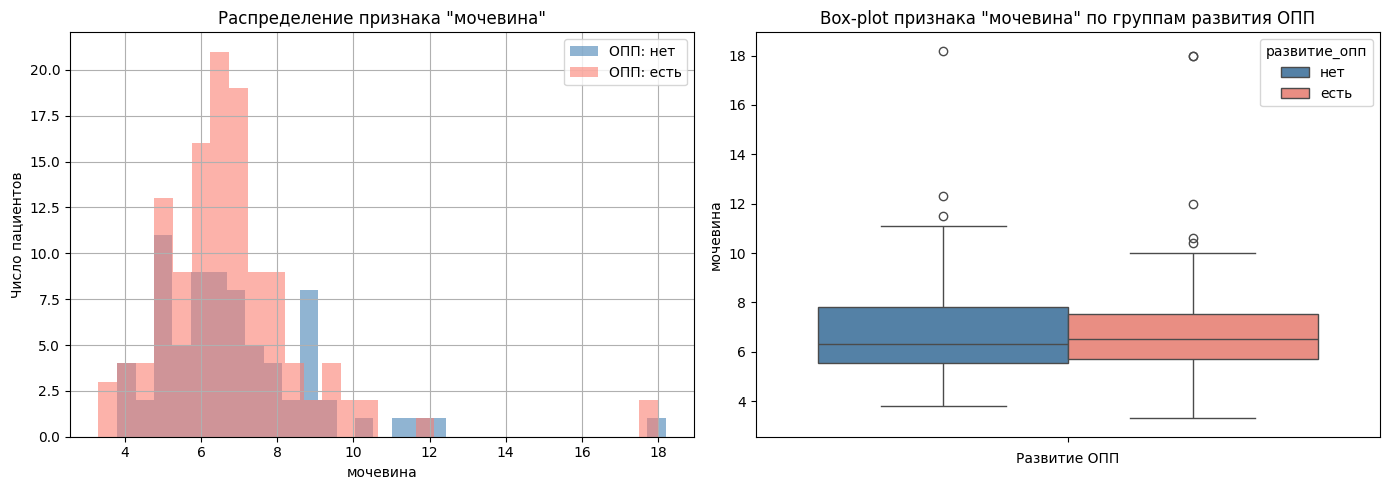

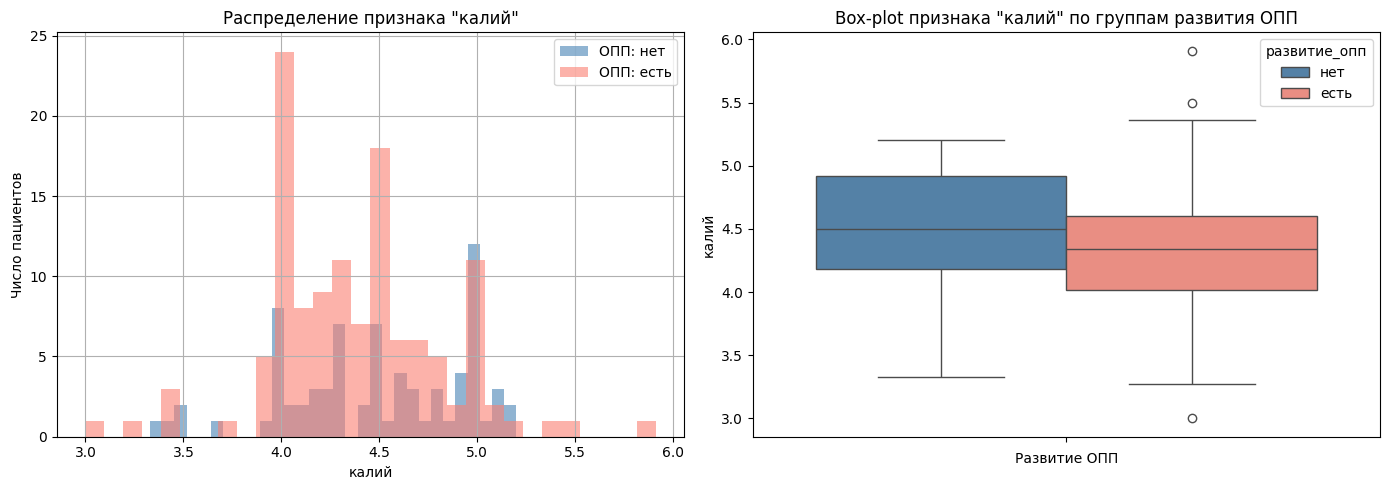

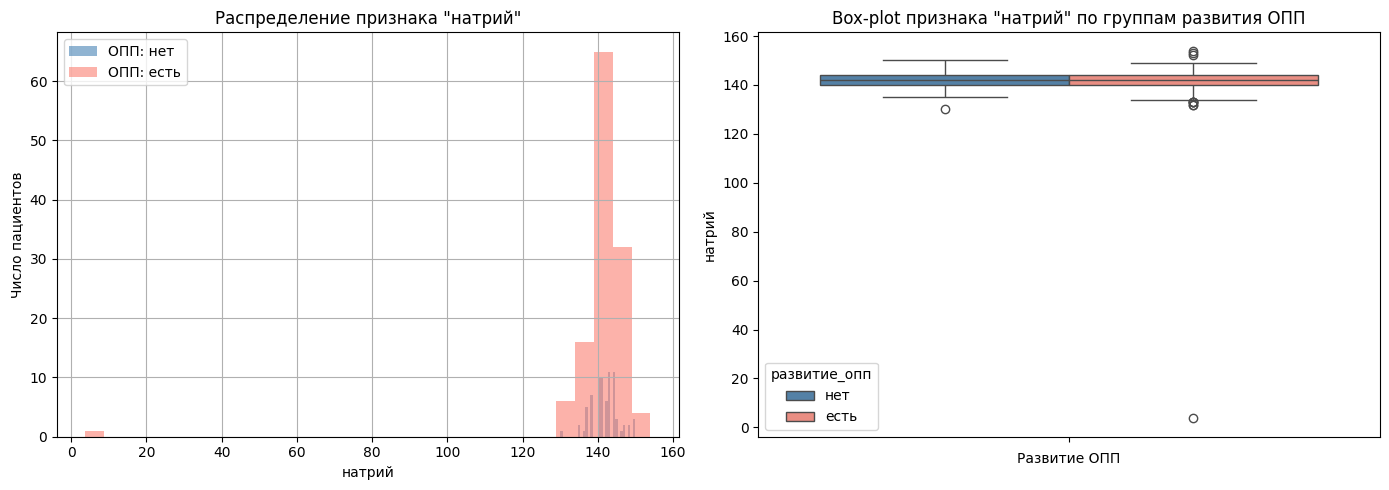

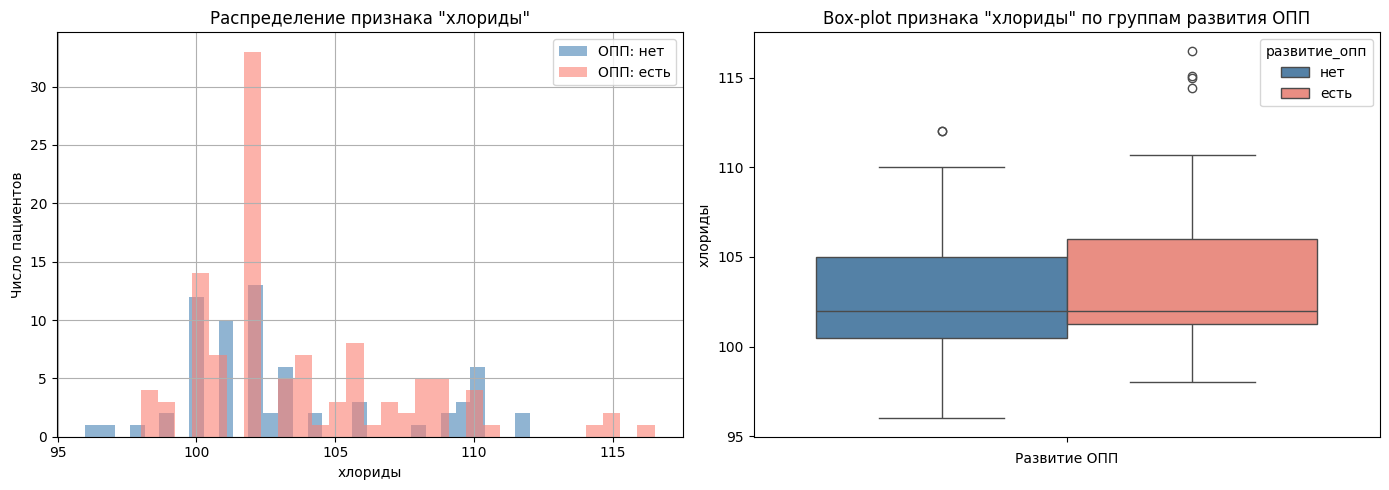

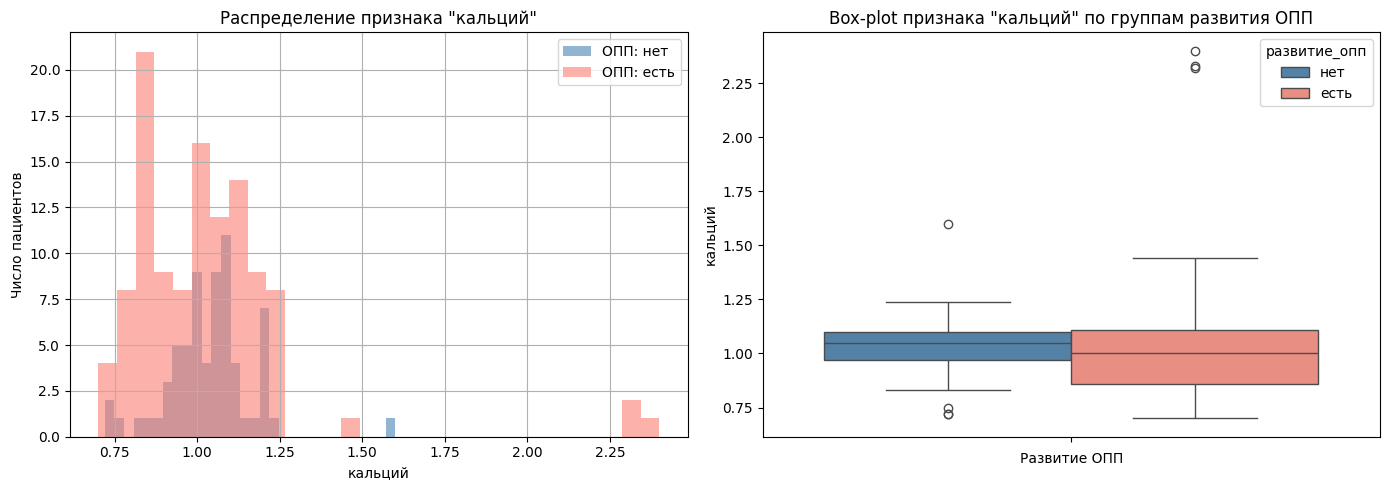

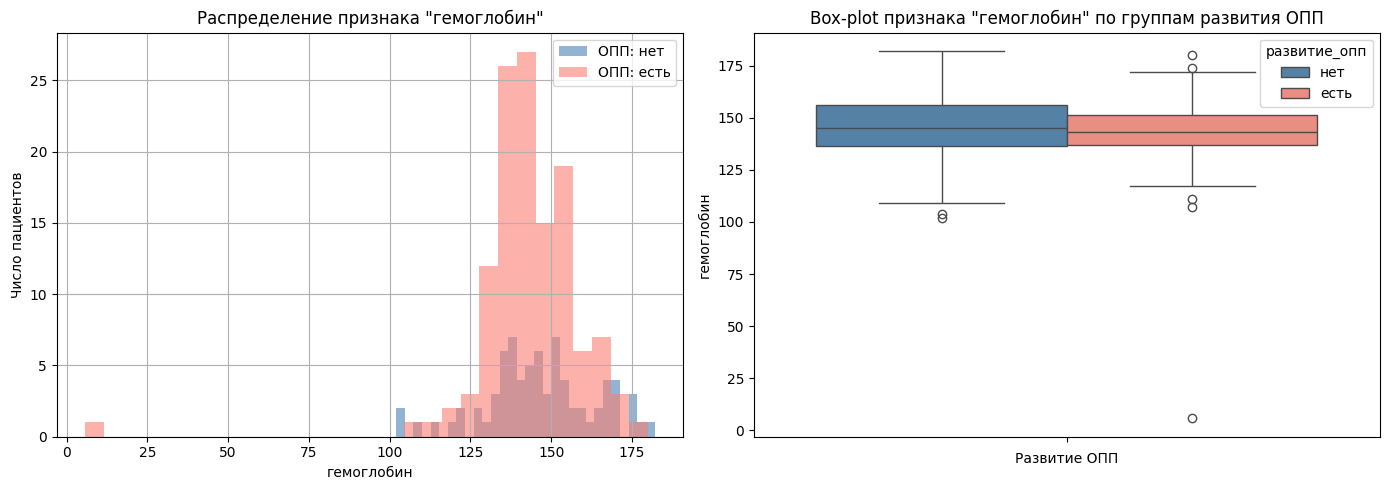

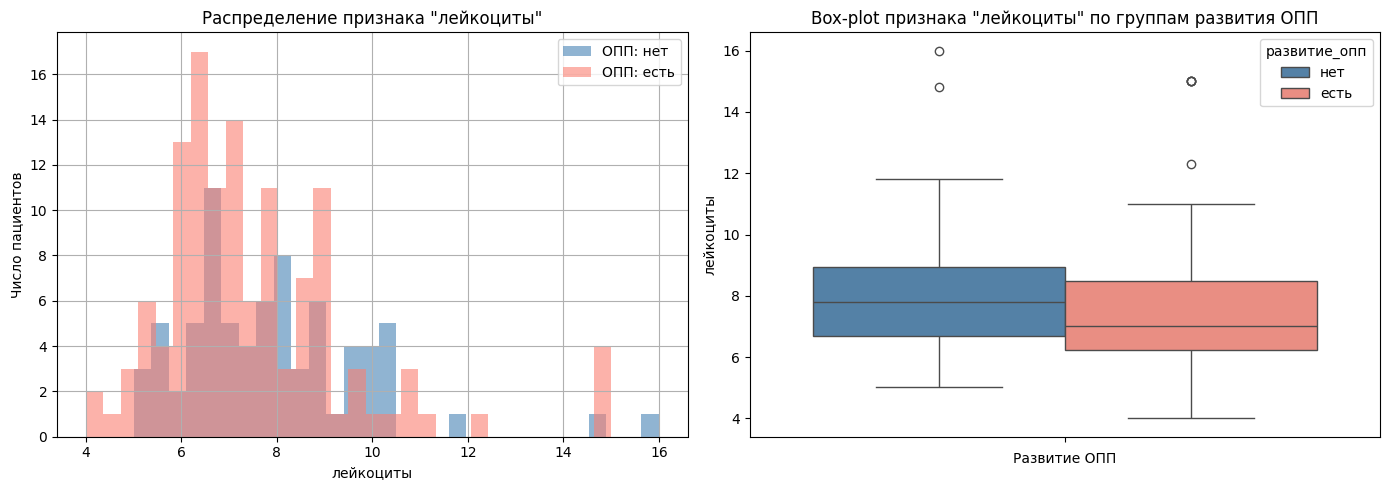

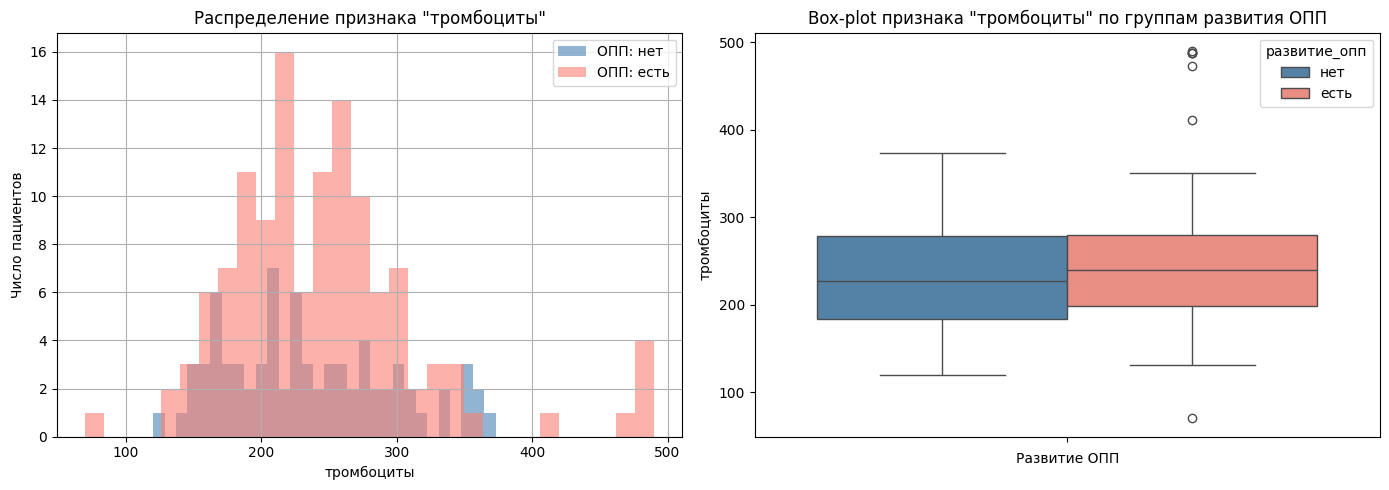

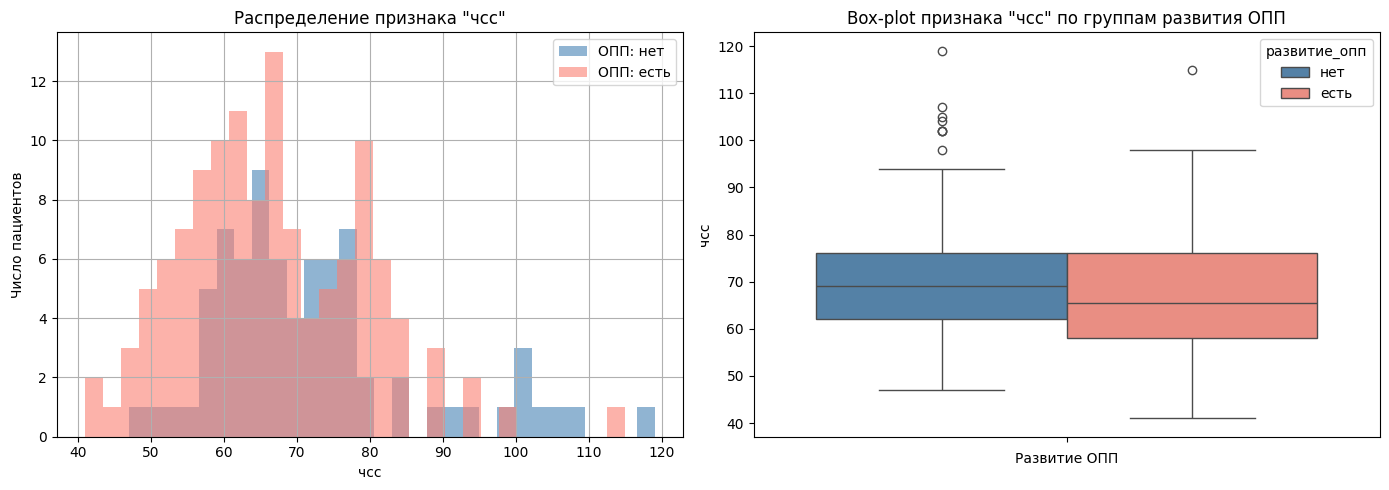

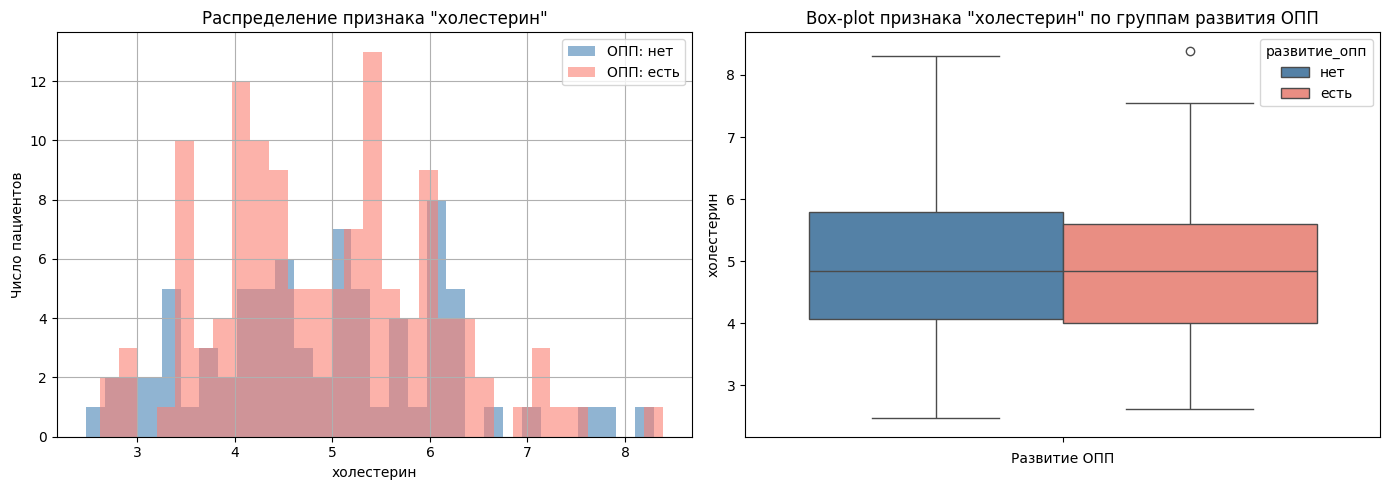

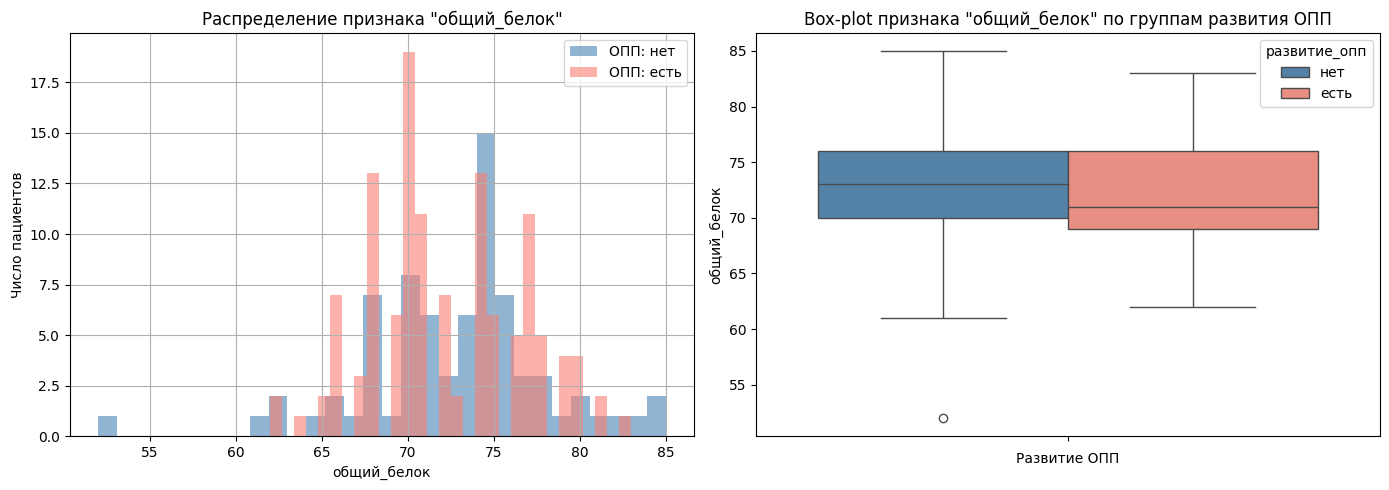

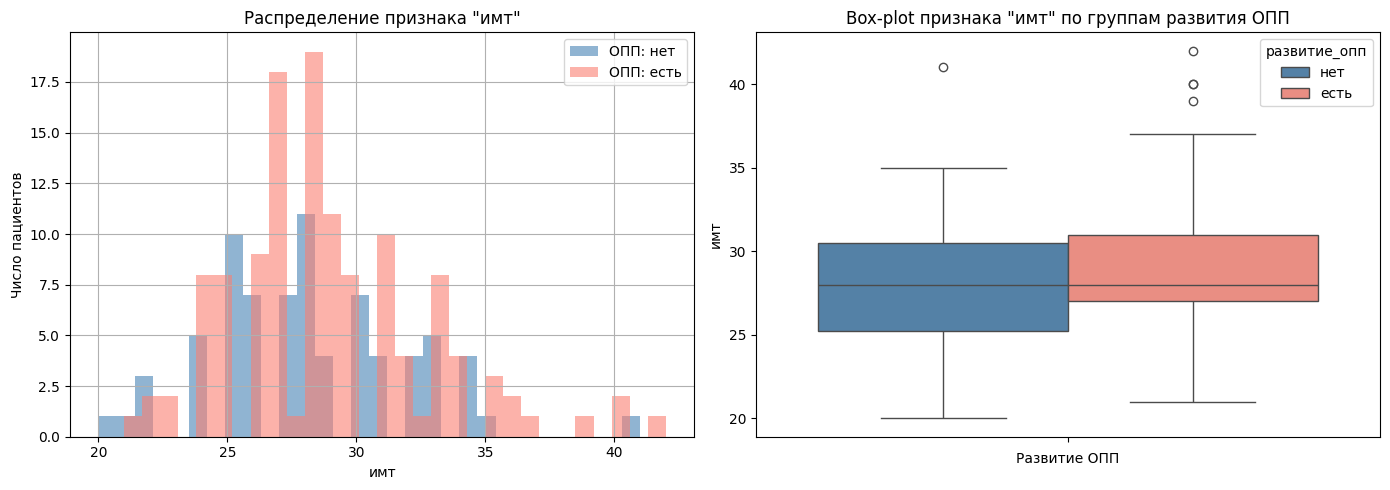

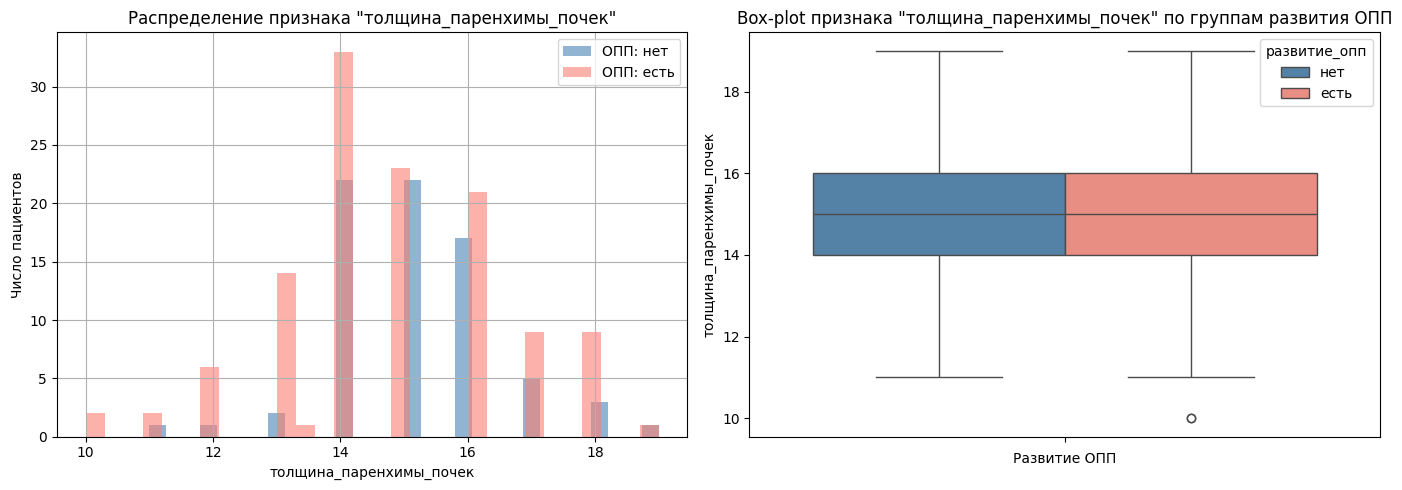

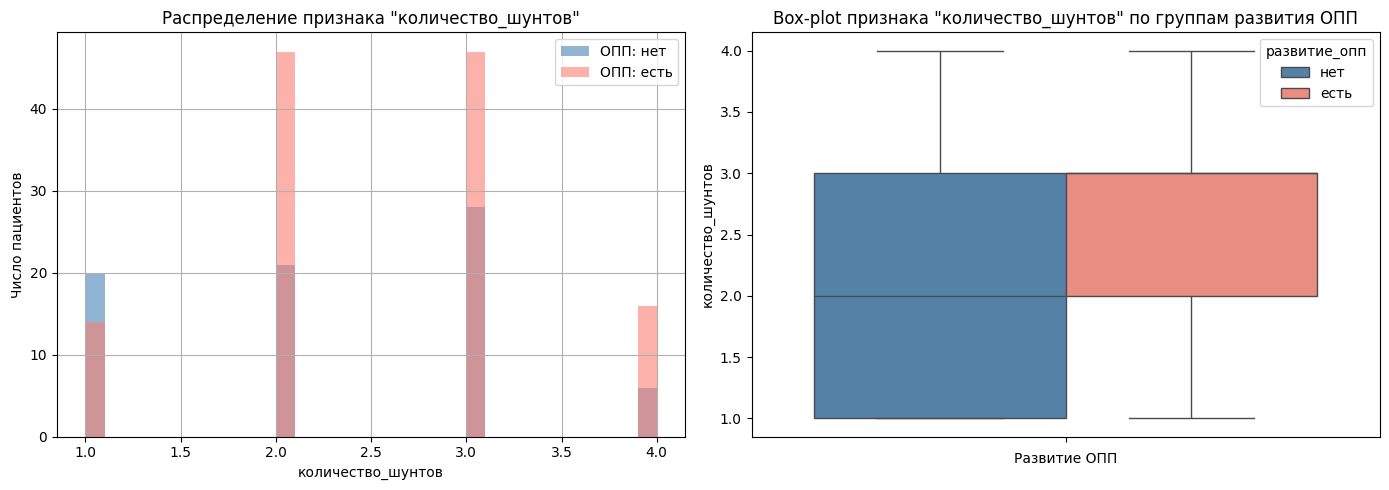

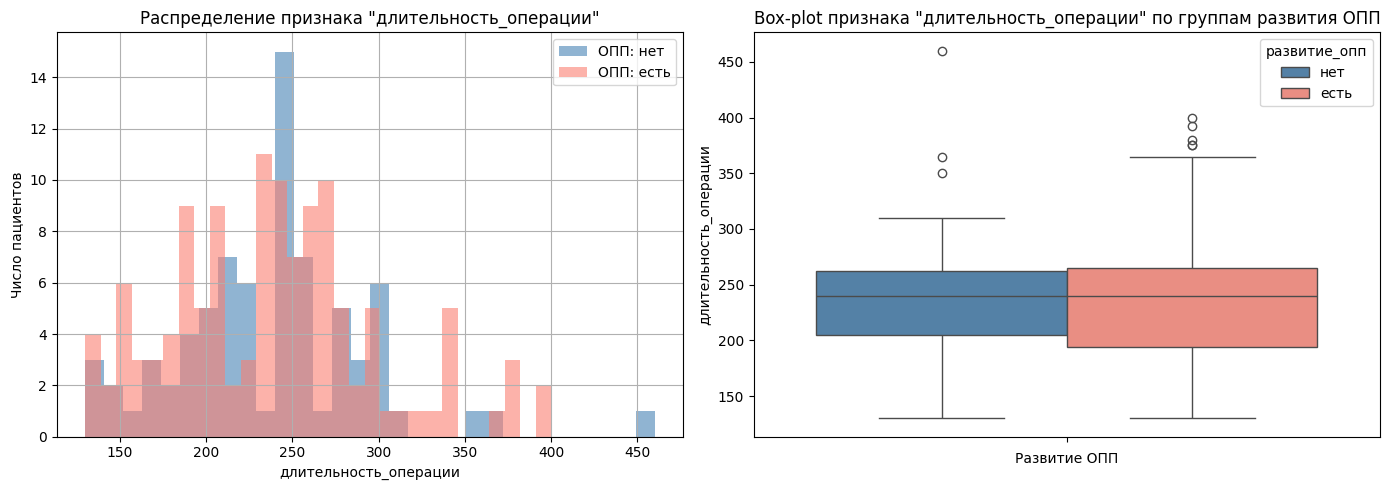

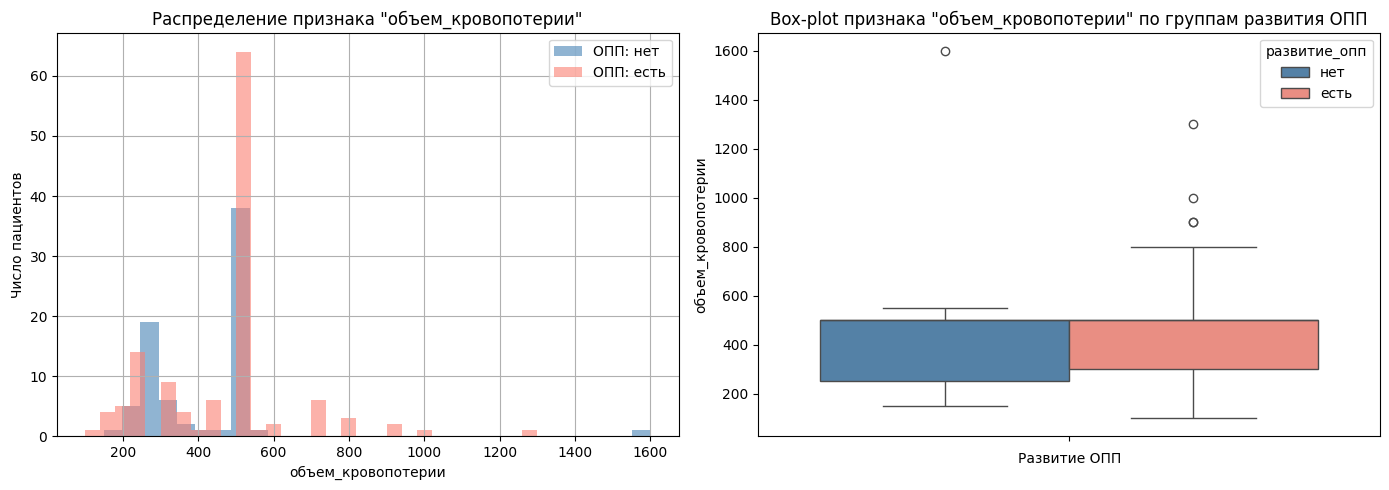

In [7]:
target_columns = ['возраст', 'сад', 'дад', 'креатинин_крови', 'мочевина', 'калий',
                  'натрий', 'хлориды', 'кальций', 'гемоглобин', 'лейкоциты',
                  'тромбоциты', 'чсс', 'холестерин', 'общий_белок',
                  'имт', 'толщина_паренхимы_почек', 'количество_шунтов',
                  'длительность_операции', 'объем_кровопотерии']

colors = ['steelblue', 'salmon']

def plot_feature_distribution(df, column):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Гистограмма
    for value, color in zip(df['развитие_опп'].unique(), colors):
        subset = df[df['развитие_опп'] == value]
        axes[0].hist(
            subset[column].dropna(),
            bins=30,
            alpha=0.6,
            label=f'ОПП: {value}',
            color=color
        )
    axes[0].set_title(f'Распределение признака "{column}"')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Число пациентов')
    axes[0].legend()
    axes[0].grid(True)

    # Boxplot
    sns.boxplot(
        data=df,
        hue='развитие_опп',
        y=column,
        palette=colors,
        ax=axes[1],
    )
    axes[1].set_title(f'Box-plot признака "{column}" по группам развития ОПП')
    axes[1].set_xlabel('Развитие ОПП')
    axes[1].set_ylabel(column)

    plt.tight_layout()
    plt.show()

# Построим все графики
for col in target_columns:
    plot_feature_distribution(df, col)


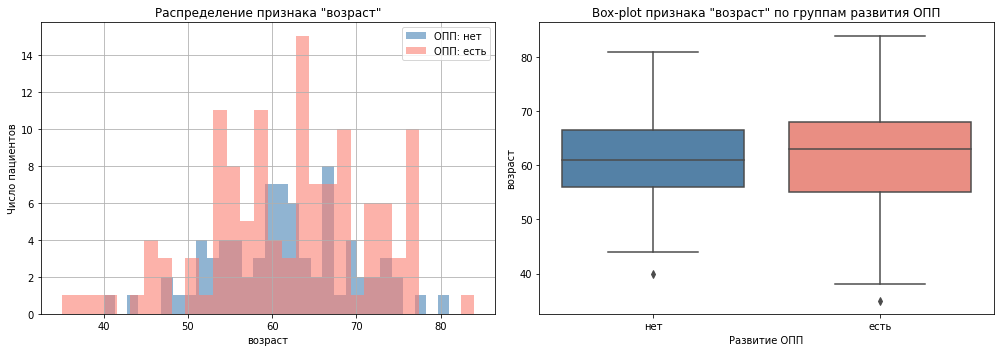

In [ ]:
plot_feature_distribution(df, 'возраст')

## Наблюдения

- Медианный возраст выше у пациентов с развитием ОПП.
- В группе с ОПП больше пациентов старшего возраста, чем в группе без ОПП.

### Гипотезы

- $\mathbf{H_0}$: Средний возраст пациентов с развитием ОПП и без него не различается.
- $\mathbf{H_1}$: Средний возраст пациентов с развитием ОПП значимо выше.


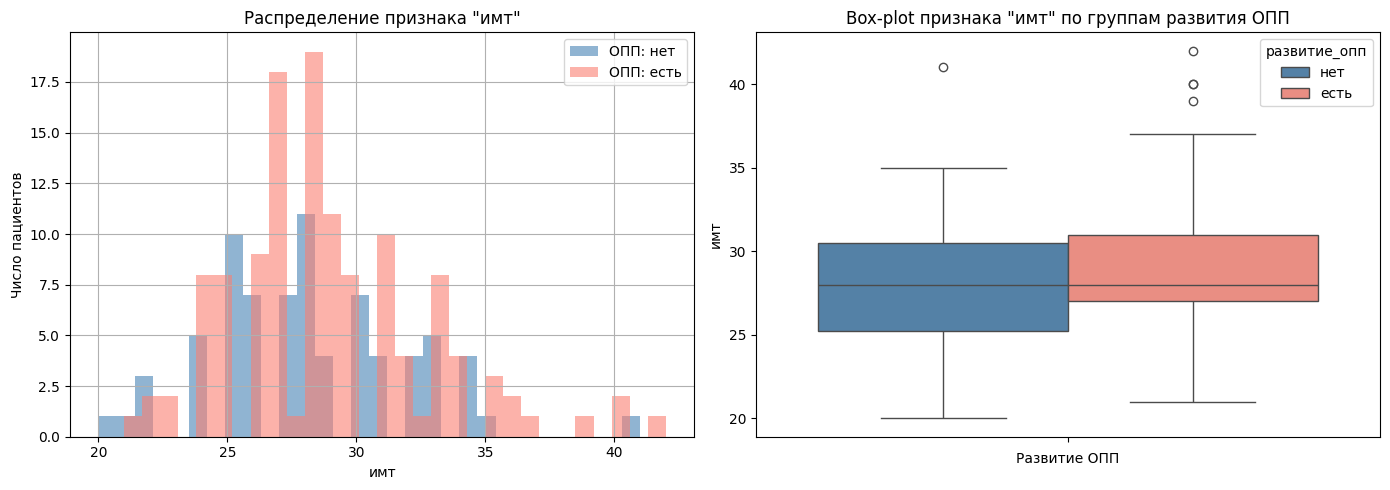

In [8]:
plot_feature_distribution(df, 'имт')

## Наблюдения

- У пациентов с ОПП медиана ИМТ выше.
- Распределения немного перекрываются, но правая часть у группы с ОПП немного смещена.
- Диапазон значений примерно одинаков, но есть высокие выбросы у пациентов с ОПП.

### Гипотезы

- $\mathbf{H_0}$: ИМТ не зависит от наличия ОПП.
- $\mathbf{H_1}$: ИМТ статистически выше у пациентов с ОПП.

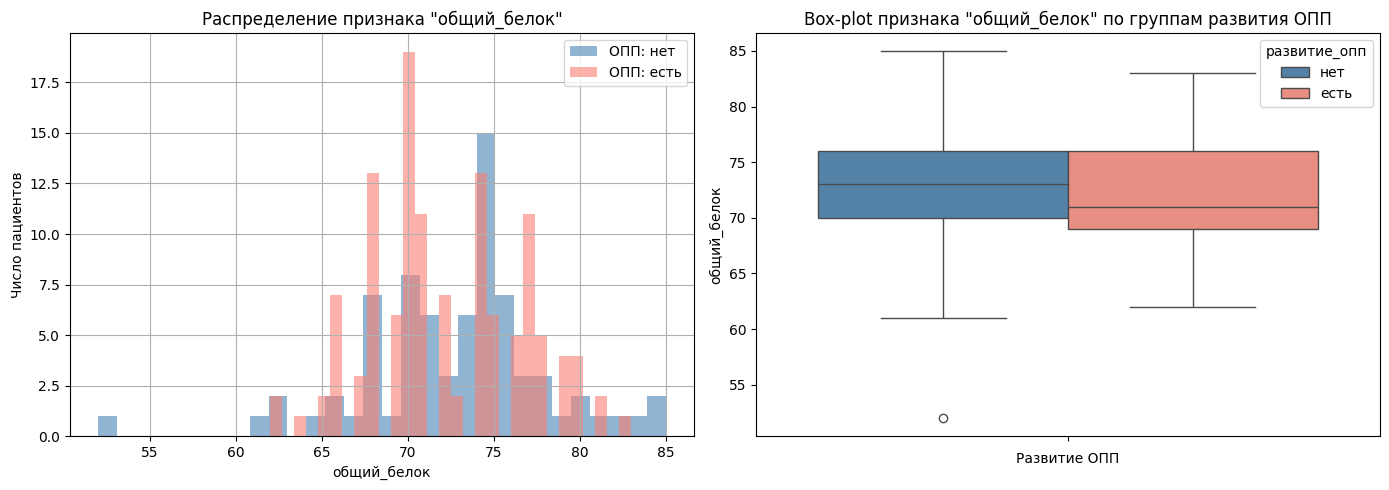

In [9]:
plot_feature_distribution(df, 'общий_белок')

## Наблюдения

- У пациентов с ОПП распределение общего белка немного смещено влево (в сторону пониженных значений).
- Медиана уровня белка у пациентов с ОПП ниже, чем у пациентов без ОПП.
- Диапазон значений шире у группы с ОПП.

### Гипотезы

- $\mathbf{H_0}$: Уровень общего белка не зависит от наличия ОПП.
- $\mathbf{H_1}$: Уровень общего белка статистически ниже у пациентов с ОПП.

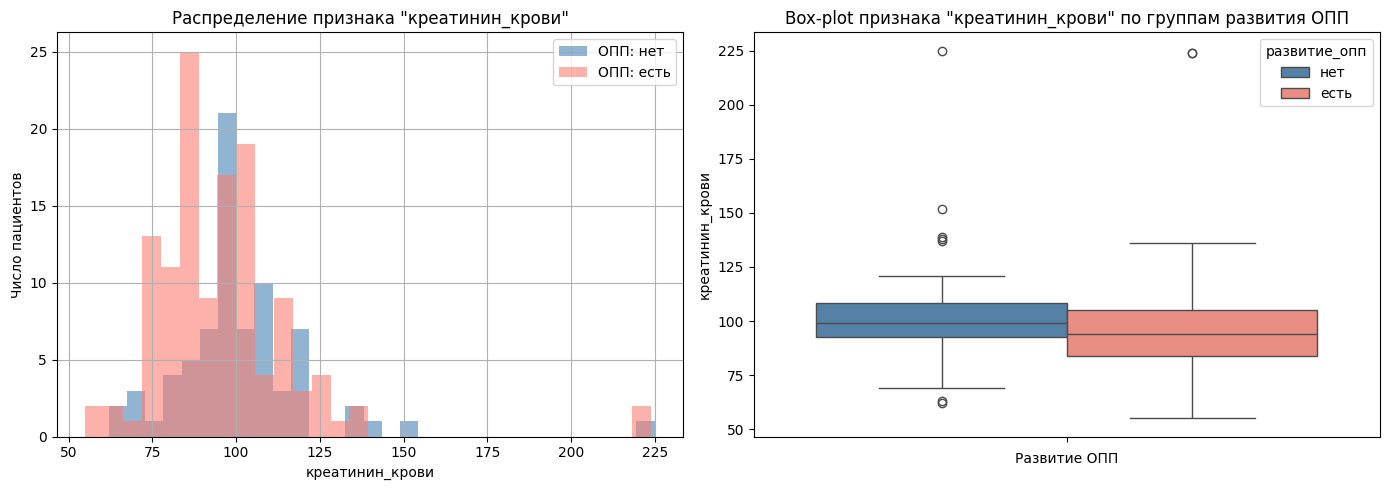

In [10]:
plot_feature_distribution(df, 'креатинин_крови')

## Наблюдения

- У пациентов с ОПП распределение креатинина сдвинуто вправо — больше значений > 120.
- Медиана и верхний квартиль у группы с ОПП заметно выше.
- Присутствуют выраженные выбросы, особенно в группе с ОПП.

### Гипотезы

- $\mathbf{H_0}$: Уровень креатинина крови не зависит от наличия ОПП.
- $\mathbf{H_1}$: Уровень креатинина крови статистически выше у пациентов с ОПП.



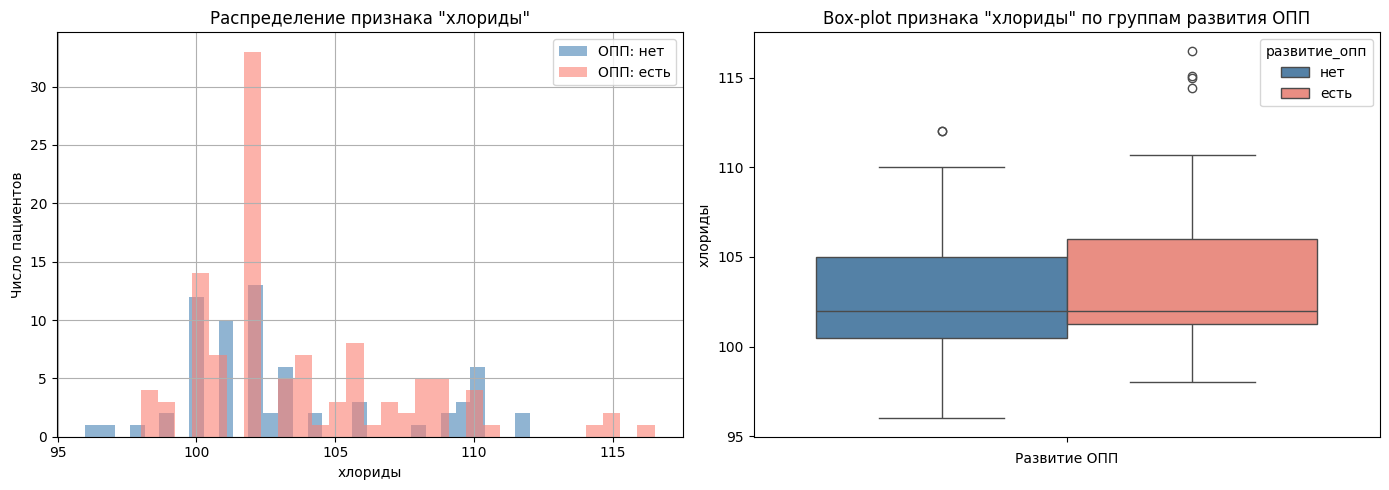

In [11]:
plot_feature_distribution(df, 'хлориды')

## Наблюдения

- У пациентов с ОПП плотность распределения хлоридов немного смещена вправо.
- Медиана выше у группы с ОПП.

### Гипотезы

- $\mathbf{H_0}$: Уровень хлоридов не зависит от наличия ОПП.
- $\mathbf{H_1}$: Уровень хлоридов статистически выше у пациентов с ОПП.

### Проведите графический анализ категориальных переменных

In [ ]:
# Цвета для групп "развитие_опп"
colors = ['steelblue', 'salmon']

# Функция для визуализации категориального признака
def plot_categorical_feature(df, column):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Столбчатая диаграмма
    crosstab = pd.crosstab(df[column], df['развитие_опп'])
    crosstab.plot(kind='bar', ax=axes[0], color=colors)
    axes[0].set_title(f'Распределение по признаку "{column}"')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Количество')
    axes[0].legend(title='ОПП')

    # Круговая диаграмма — пациенты без ОПП
    df_no = df[df['развитие_опп'] == 'нет'][column].value_counts()
    axes[1].pie(df_no, labels=df_no.index, autopct='%1.1f%%',
                startangle=90, colors=sns.color_palette('pastel'))
    axes[1].set_title(f'"{column}" среди пациентов без ОПП')

    # Круговая диаграмма — пациенты с ОПП
    df_yes = df[df['развитие_опп'] == 'есть'][column].value_counts()
    axes[2].pie(df_yes, labels=df_yes.index, autopct='%1.1f%%',
                startangle=90, colors=sns.color_palette('Set2'))
    axes[2].set_title(f'"{column}" среди пациентов с ОПП')

    plt.tight_layout()
    plt.show()


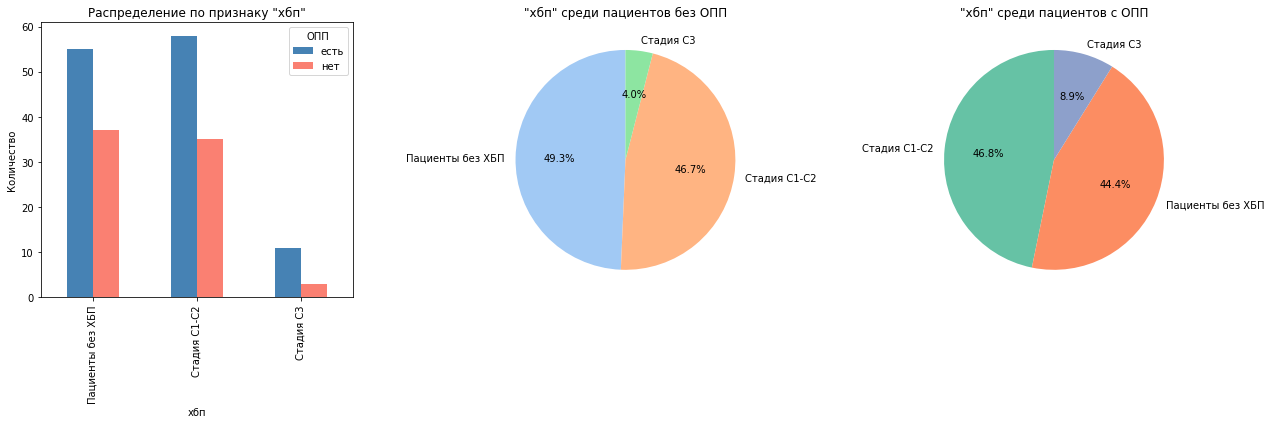

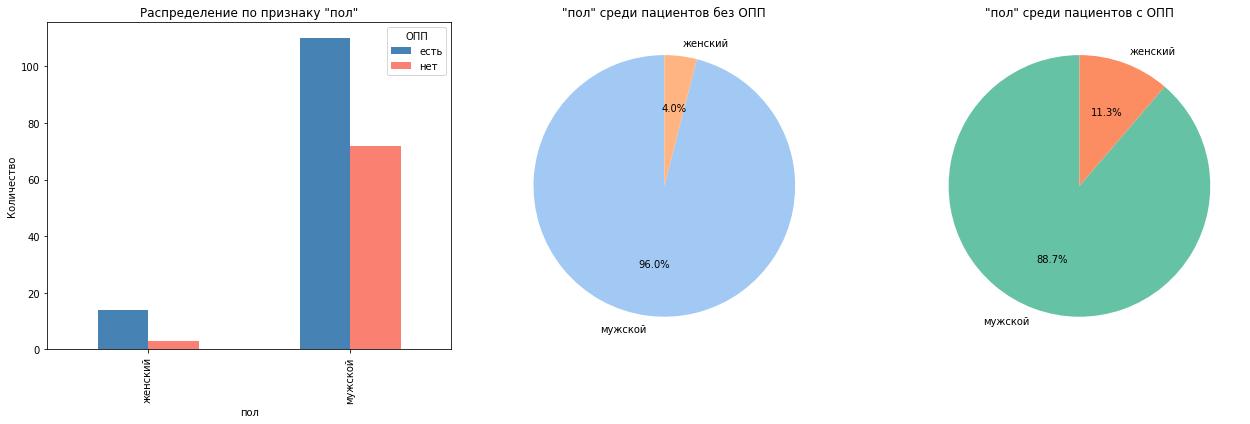

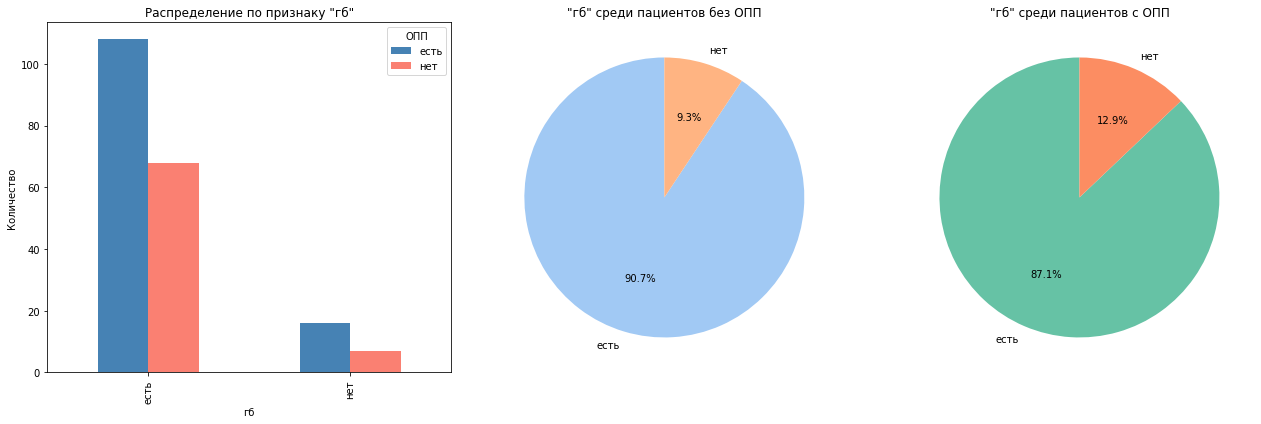

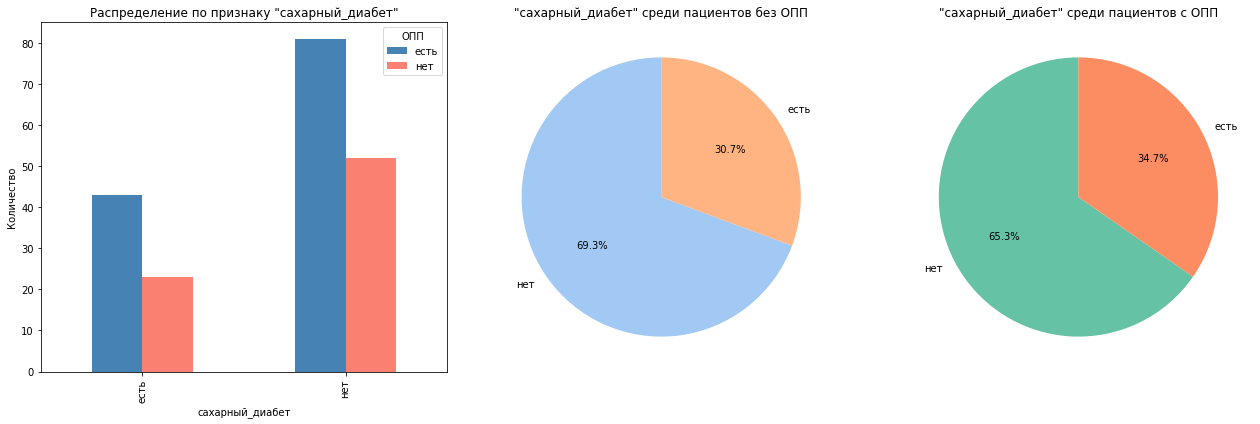

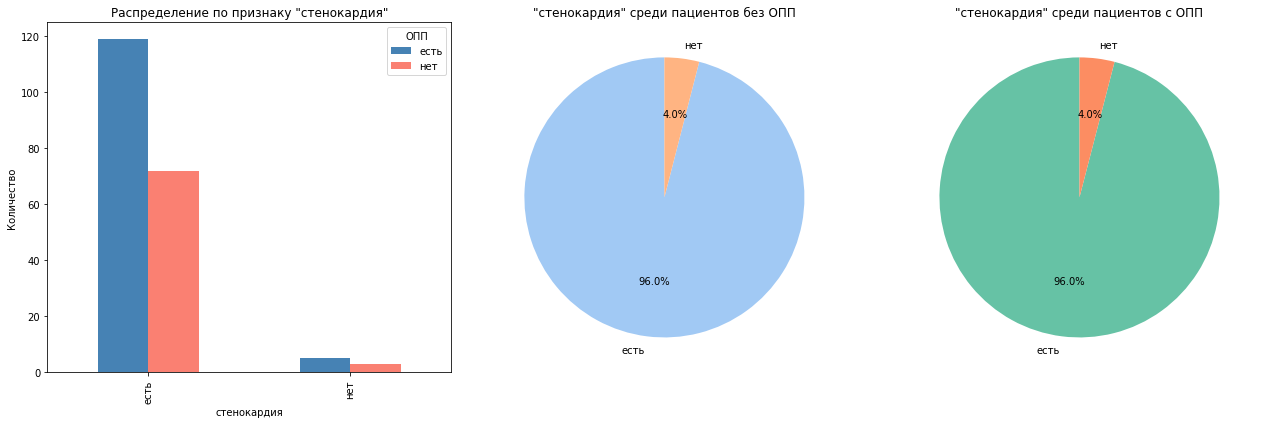

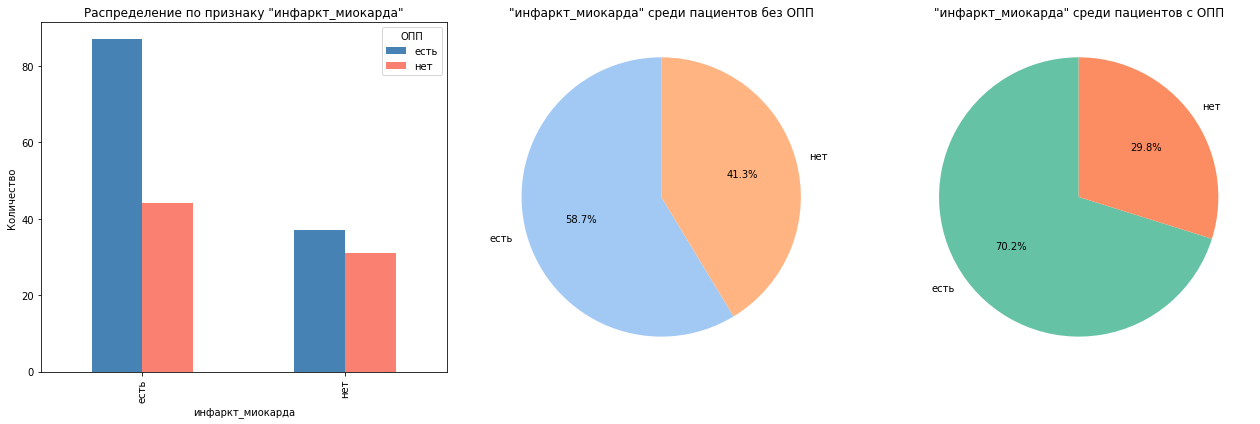

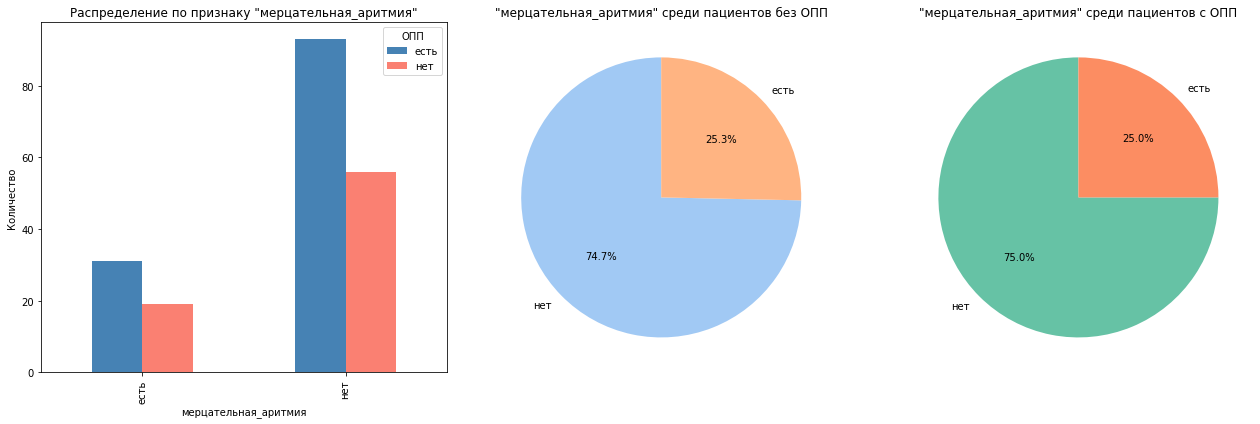

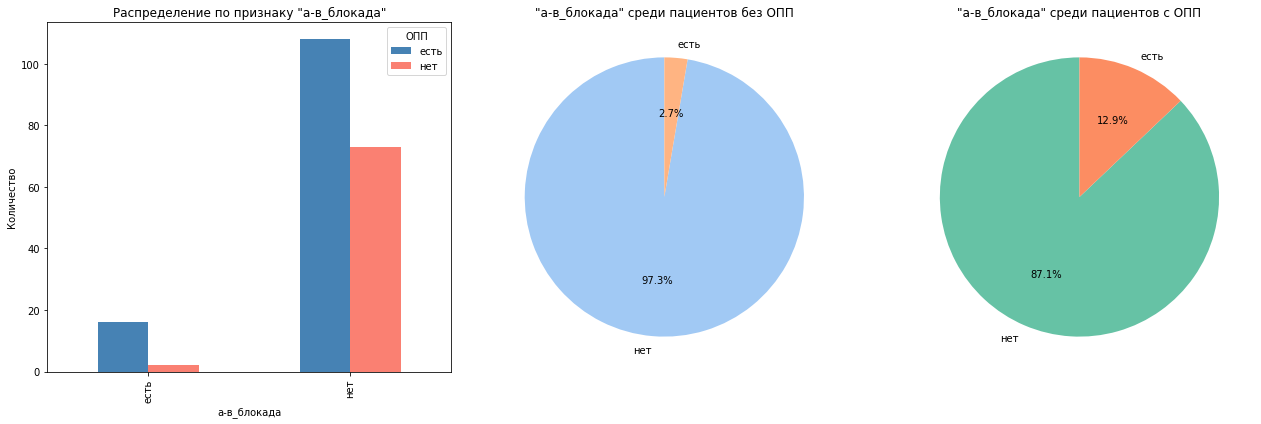

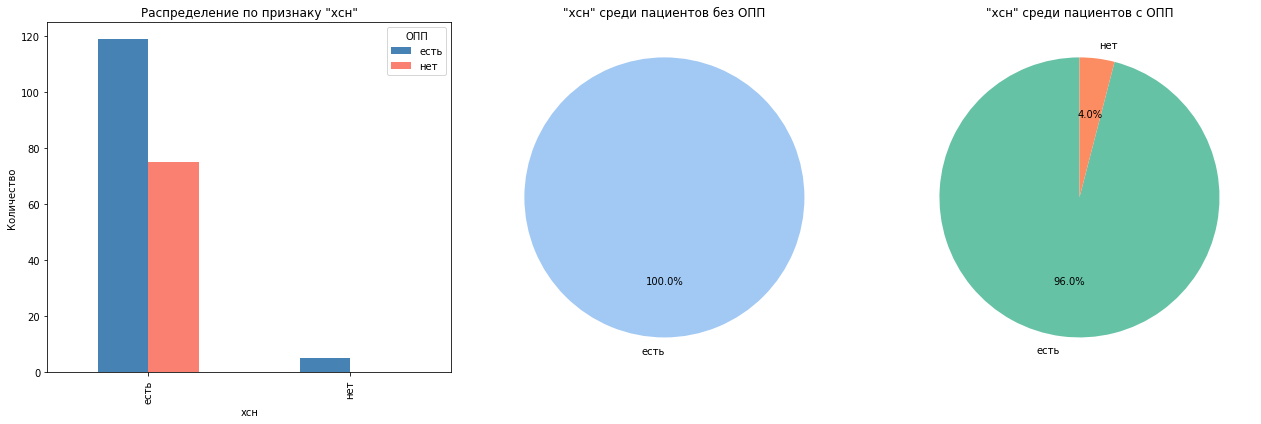

In [ ]:
categorical_cols = [
    'хбп', 'пол', 'гб', 'сахарный_диабет', 'стенокардия',
    'инфаркт_миокарда', 'мерцательная_аритмия', 'а-в_блокада', 'хсн'
]

for col in categorical_cols:
    plot_categorical_feature(df, col)

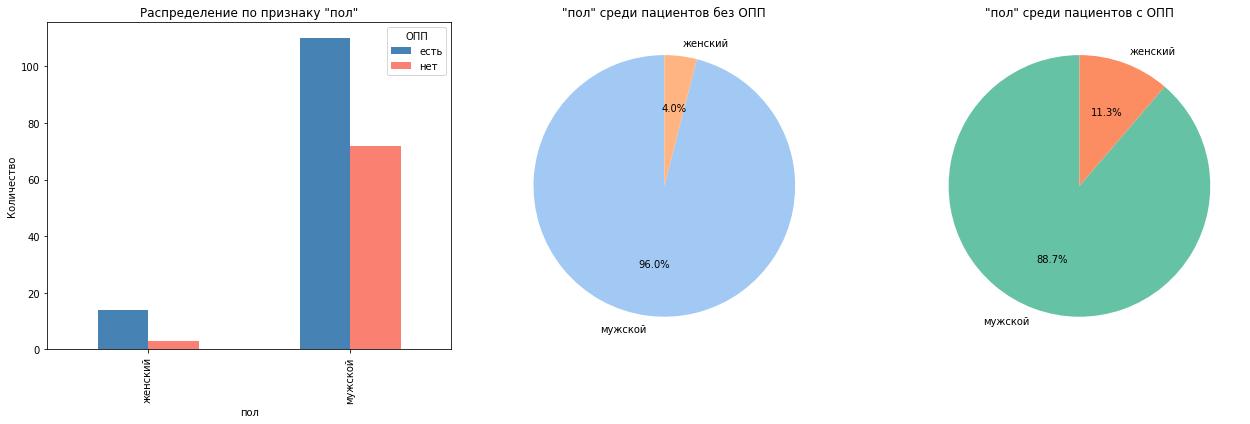

In [ ]:
plot_categorical_feature(df, 'пол')

### Наблюдения:
- В группе с ОПП наблюдается больше мужчин.
- У женщин ОПП развивается реже.
- Распределение по полу различается между группами.

### Гипотезы:
- $H_0$: Частота развития ОПП не зависит от пола пациента.
- $H_1$: Частота развития ОПП зависит от пола пациента.

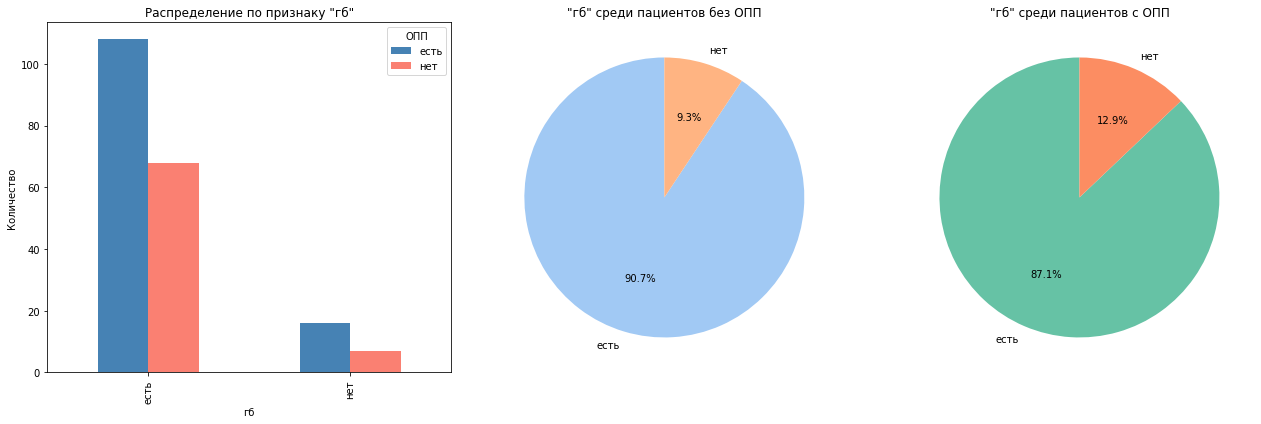

In [ ]:
plot_categorical_feature(df, 'гб')

### Наблюдения:
- В группе с ОПП доля пациентов с гипертензией выше.
- Признак гипертензии встречается значительно чаще у пациентов с ОПП.

### Гипотезы:
- $H_0$: Частота развития ОПП не зависит от наличия гипертензии.
- $H_1$: Частота развития ОПП зависит от наличия гипертензии.

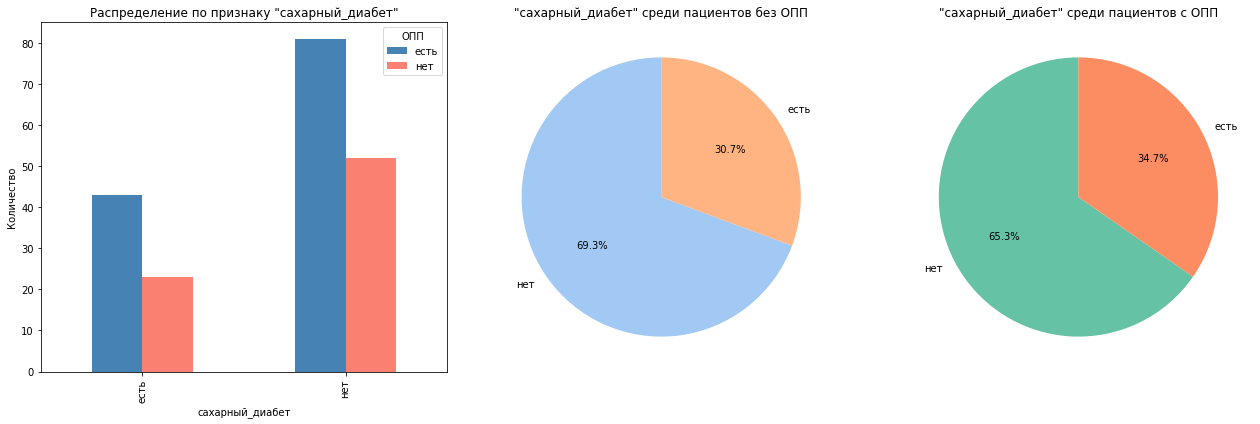

In [ ]:
plot_categorical_feature(df, 'сахарный_диабет')

### Наблюдения:
- Диабет чаще встречается в группе с ОПП.
- Различие между группами по признаку "сахарный диабет" визуально выражено.

### Гипотезы:
- $H_0$: Частота развития ОПП не зависит от наличия диабета.
- $H_1$: Частота развития ОПП зависит от наличия диабета

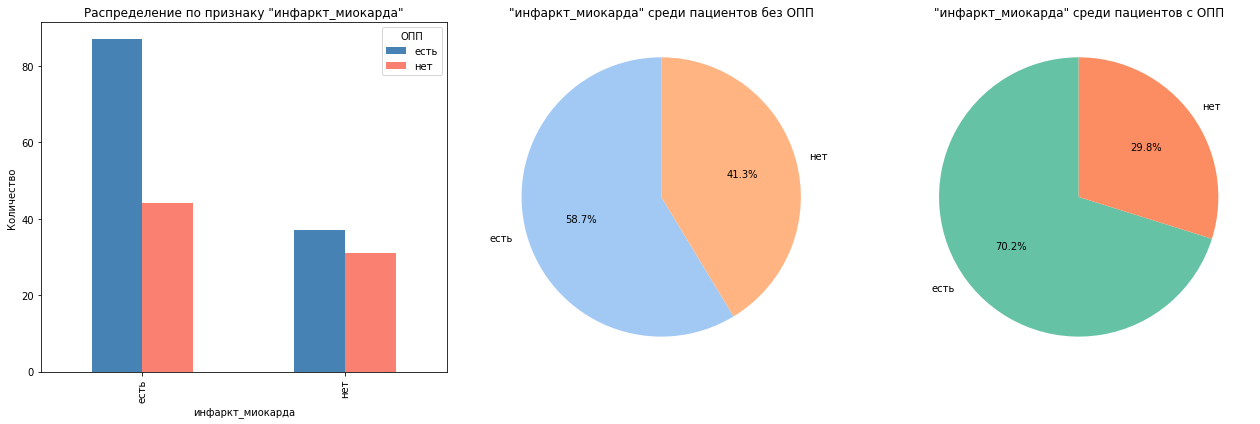

In [ ]:
plot_categorical_feature(df, 'инфаркт_миокарда')

### Наблюдения:
- Инфаркт миокарда чаще встречается в группе с ОПП.
- У пациентов с ОПП доля перенесших ИМ выше по сравнению с группой без ОПП.

### Гипотезы:
- $H_0$: Частота развития ОПП не зависит от наличия инфаркта миокарда.
- $H_1$: Частота развития ОПП зависит от наличия инфаркта миокарда.

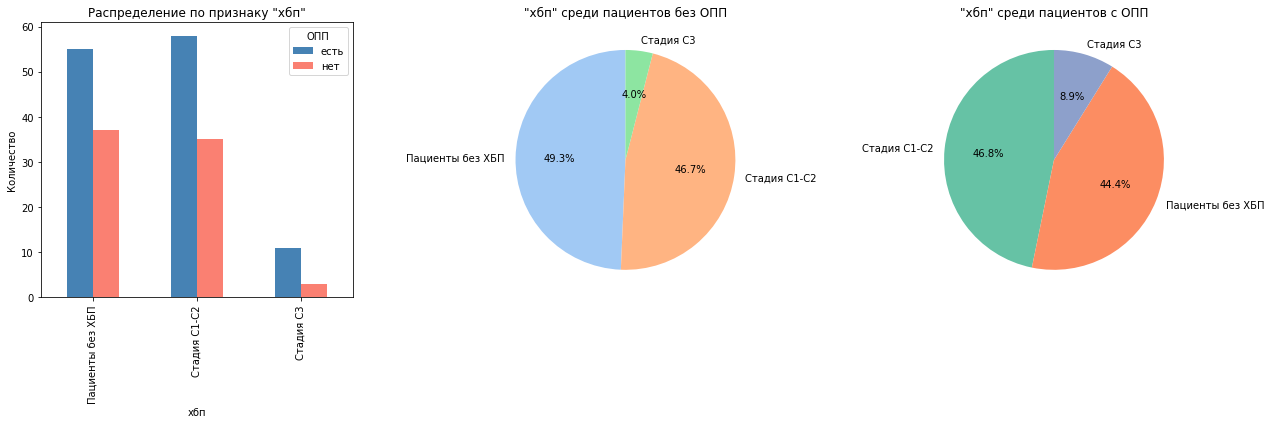

In [ ]:
plot_categorical_feature(df, 'хбп')

### Наблюдения:
- Более продвинутые стадии ХБП (например, 3 и выше) чаще встречаются в группе с ОПП.
- У пациентов без ОПП чаще наблюдаются ранние стадии или отсутствие ХБП.

### Гипотезы:
- $H_0$: Частота развития ОПП не зависит от наличия ХБП.
- $H_1$: Частота развития ОПП зависит от наличия ХБП.

### Проверьте сформулированные гипотезы

In [ ]:
quant_tests = {
    'возраст': 'greater',             # H₁: возраст при ОПП выше
    'имт': 'greater',                 # H₁: ИМТ при ОПП выше
    'общий_белок': 'less',            # H₁: общий белок при ОПП ниже
    'креатинин_крови': 'greater',     # H₁: креатинин при ОПП выше
    'хлориды': 'greater',             # H₁: хлориды при ОПП выше
}

for col, alt in quant_tests.items():
    group_1 = df[df['развитие_опп'] == 'есть'][col].dropna()
    group_2 = df[df['развитие_опп'] == 'нет'][col].dropna()
    stat, p = mannwhitneyu(group_1, group_2, alternative=alt)
    print(f"Гипотеза по признаку '{col}': p-value = {p:.4f} (alternative='{alt}')")

Гипотеза по признаку 'возраст': p-value = 0.2431 (alternative='greater')
Гипотеза по признаку 'имт': p-value = 0.1136 (alternative='greater')
Гипотеза по признаку 'общий_белок': p-value = 0.1360 (alternative='less')
Гипотеза по признаку 'креатинин_крови': p-value = 0.9901 (alternative='greater')
Гипотеза по признаку 'хлориды': p-value = 0.1290 (alternative='greater')


In [ ]:
cat_cols = ['пол', 'инфаркт_миокарда', 'гб', 'сахарный_диабет', 'хбп']
for col in cat_cols:
    cross = pd.crosstab(df[col], df['развитие_опп'])
    chi2, p, _, _ = chi2_contingency(cross)
    print(f"Гипотеза по категориальному признаку '{col}': p-value = {p:.4f}")

Гипотеза по категориальному признаку 'пол': p-value = 0.1282
Гипотеза по категориальному признаку 'инфаркт_миокарда': p-value = 0.1329
Гипотеза по категориальному признаку 'гб': p-value = 0.5930
Гипотеза по категориальному признаку 'сахарный_диабет': p-value = 0.6694
Гипотеза по категориальному признаку 'хбп': p-value = 0.4012


### Проанализируйте дополнительные гипотезы

### Гипотезы:
- $H_0$: У пациентов с сахарным диабетом и стенокардией уровень мочевины при наличии ОПП не выше, чем при его отсутствии.  
- $H_1$: У пациентов с сахарным диабетом и стенокардией уровень мочевины выше при наличии ОПП.  
_(распределение мочевины сдвинуто вправо в группе с ОПП)_

In [ ]:
# Комбинированная гипотеза: диабет + стенокардия
subset = df[(df['сахарный_диабет'] == 'есть') & (df['стенокардия'] == 'есть')]
group_yes = subset[subset['развитие_опп'] == 'есть']['мочевина']
group_no = subset[subset['развитие_опп'] == 'нет']['мочевина']
stat, p = mannwhitneyu(group_yes.dropna(), group_no.dropna())
print(f"Гипотеза: мочевина выше у диабетиков со стенокардией и ОПП: p-value = {p:.4f}")


Гипотеза: мочевина выше у диабетиков со стенокардией и ОПП: p-value = 0.7455


- $H_0$ У пациентов с гипертонией и диабетом уровень креатинина при наличии ОПП не выше, чем при его отсутствии.  
- $H_1$ У пациентов с гипертонией и диабетом уровень креатинина выше при наличии ОПП.

In [ ]:
# Комбинированная гипотеза: диабет + гипертония

subset = df[(df['гб'] == 'есть') & (df['сахарный_диабет'] == 'есть')]
group_yes = subset[subset['развитие_опп'] == 'есть']['креатинин_крови'].dropna()
group_no = subset[subset['развитие_опп'] == 'нет']['креатинин_крови'].dropna()

stat, p = mannwhitneyu(group_yes, group_no, alternative='greater')
print(f"Гипотеза: креатинин выше у пациентов с ГБ и диабетом и ОПП: p-value = {p:.4f}")

Гипотеза: креатинин выше у пациентов с ГБ и диабетом и ОПП: p-value = 0.7222


- $H_0$ Частота развития ОПП не зависит от ХБП стадии 3+.
- $H_1$ Частота развития ОПП зависит от ХБП стадии 3+.

In [ ]:
#ХБП стадии ≥ 3 → выше риск ОПП (категориальный χ²)

df['хбп_стадия_3+'] = df['хбп'].apply(lambda x: 'да' if str(x).startswith(('3', '4', '5')) else 'нет')
cross = pd.crosstab(df['хбп_стадия_3+'], df['развитие_опп'])
chi2, p, _, _ = chi2_contingency(cross)
print(f"Гипотеза: частота развития ОПП зависит от ХБП стадии 3+: p-value = {p:.4f}")

Гипотеза: частота развития ОПП зависит от ХБП стадии 3+: p-value = 1.0000


 - $H_0$ Частота развития ОПП не зависит от возраста ≥70 лет.
 - $H_1$ Частота развития ОПП зависит от возраста ≥70 лет.

In [ ]:
#Возраст ≥ 70 лет → выше риск ОПП

df['возраст_70+'] = df['возраст'].apply(lambda x: 'да' if x >= 70 else 'нет')
cross = pd.crosstab(df['возраст_70+'], df['развитие_опп'])
chi2, p, _, _ = chi2_contingency(cross)
print(f"Гипотеза: частота развития ОПП зависит от возраста ≥70 лет: p-value = {p:.4f}")

Гипотеза: частота развития ОПП зависит от возраста ≥70 лет: p-value = 0.4178


 - $H_0$ Частота развития ОПП не зависит от уровня общего белка <65 г/л и ≥65 г/л.  
 - $H_1$ Частота развития ОПП зависит от уровня общего белка <65 г/л и ≥65 г/л.  

In [ ]:
#Снижение общего белка (< 65 г/л) → выше частота ОПП

df['белок_ниже_65'] = df['общий_белок'].apply(lambda x: 'да' if x < 65 else 'нет')
cross = pd.crosstab(df['белок_ниже_65'], df['развитие_опп'])
chi2, p, _, _ = chi2_contingency(cross)
print(f"Гипотеза: частота развития ОПП зависит от уровня общего белка <65 г/л и ≥65 г/л.  : p-value = {p:.4f}")

Гипотеза: частота развития ОПП зависит от уровня общего белка <65 г/л и ≥65 г/л.  : p-value = 0.4938


### Подведите итоги

### Общие выводы по результатам статистической проверки гипотез

В рамках исследования было проверено 15 гипотез, включая количественные, категориальные и комбинированные признаки. В качестве критериев использовались тест Манна—Уитни (для количественных переменных) и хи-квадрат (для категориальных).

#### Количественные признаки:
- По результатам тестов не получено статистически значимых различий между группами с ОПП и без ОПП по признакам:
  - Возраст (p = 0.2431, `greater`)  
  - ИМТ (p = 0.1136, `greater`)
  - Креатинин крови (p = 0.9901, `greater`)
  - Хлориды (p = 0.1290, `greater`)
  - Общий белок (p = 0.1360, `less`)
  
  > Несмотря на это, графический анализ показал тенденции к повышению значений у пациентов с ОПП, особенно по возрасту и хлоридам, что может говорить о клинически значимой, но статистически не подтверждённой разнице.

#### Категориальные признаки:
- Проверка хи-квадратом не выявила значимых ассоциаций по следующим признакам:
  - Пол (p = 0.1282)
  - Инфаркт миокарда (p = 0.1329)
  - Гипертония (p = 0.5930)
  - Сахарный диабет (p = 0.6694)
  - ХБП (p = 0.4012)
  
  > Это означает, что различия между группами с/без ОПП по этим факторам не достигают статистической значимости. Тем не менее, визуальный анализ показывает, что в группе с ОПП чаще встречались пациенты с диабетом и гипертонией.

#### Комбинированные гипотезы:
- Уровень мочевины у пациентов с сочетанием диабета и стенокардии не оказался статистически выше у группы с ОПП (p = 0.7455).
- При наличии гипертонии и диабета уровень креатинина также не показал значимого увеличения у пациентов с ОПП (p = 0.7222).
- Частота ОПП у пациентов не зависит от стадии ХБП ≥ 3(p = 1.0000).
- Частота ОПП не зависит от возраста ≥ 70 лет (p = 0.4178).
- Снижение общего белка (<65 г/л) не зависит частоты развития ОПП (p = 0.4938).

#### Заключение:
- Ни одна из выдвинутых гипотез не была статистически подтверждена на уровне значимости 0.05.
- Однако, графический анализ и клиническая интерпретация указывают на возможные важные паттерны, требующие дополнительного изучения при увеличении выборки.
- Наиболее перспективными факторами для дальнейшего анализа остаются: возраст, диабет, гипертония, хроническая болезнь почек и низкий белок.

> Выводы подчеркивают необходимость сочетания статистических тестов с клиническим суждением и визуализацией данных.
